## Observations and Insights 

In [53]:
# Dependencies and Setup
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = study_results.dropna(axis=1)
merged = mouse_metadata.merge(study_results, on='Mouse ID')
merged.to_csv("output.csv", index=False)

# Display the data table for preview, and drop extra columns
merged_df = pd.read_csv("output.csv")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Locating data with duplicates of both criteria, and displaying by Mouse ID
duplicates_df = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID","Timepoint"], keep = False) == True]
duplicates_df = pd.DataFrame(duplicates_df["Mouse ID"].drop_duplicates())
duplicates_df

,Mouse ID
908,g989


In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data_df = duplicates_df.merge(merged_df, on = "Mouse ID")
duplicates_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df = merged_df.copy()
cleandata_df = cleandata_df.loc[(~cleandata_df["Mouse ID"].isin(duplicates_df["Mouse ID"]))]
cleandata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice in the clean DataFrame.
cleandata_df["Mouse ID"].nunique()

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculating each statistic for Tumor Volume after grouping by Drug Regimen
mean_tvol = cleandata_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tvol = mean_tvol.reset_index()
mean_tvol = mean_tvol.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_tvol = cleandata_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tvol = median_tvol.reset_index()
median_tvol = median_tvol.rename(columns={"Tumor Volume (mm3)":"Median"})

var_tvol = cleandata_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
var_tvol = var_tvol.reset_index()
var_tvol = var_tvol.rename(columns={"Tumor Volume (mm3)":"Variance"})

std_dev_tvol = cleandata_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_dev_tvol = std_dev_tvol.reset_index()
std_dev_tvol = std_dev_tvol.rename(columns={"Tumor Volume (mm3)":"Std Dev"})

sem_tvol = cleandata_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_tvol = sem_tvol.reset_index()
sem_tvol = sem_tvol.rename(columns={"Tumor Volume (mm3)":"SEM"})

# Creating summary statistics table using imported reduce function from functools
stats = [mean_tvol, median_tvol, var_tvol, std_dev_tvol, sem_tvol]
summary_stats_df1 = reduce(lambda left,right: pd.merge(left, right, on=["Drug Regimen"], how="outer"), stats)
summary_stats_df1

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df2 = cleandata_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_stats_df2.rename(columns={"mean":"Mean",
                          "median":"Median",
                          "var":"Variance",
                          "std":"Std Dev",
                          "sem":"SEM"}, 
                 inplace=True)
summary_stats_df2 

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Finding the number of mice in each regimen 
mice_num = cleandata_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mice_num

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [62]:
# Creating a list of regimens 
regimens = cleandata_df["Drug Regimen"].unique()
print(regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


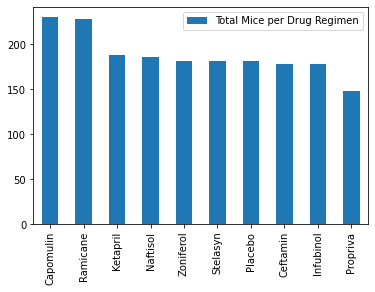

In [73]:
# Creating bar plot using pandas showing the total number of mice for each drug regimen
mouseplt =cleandata_df["Drug Regimen"].value_counts()
mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="Total Mice per Drug Regimen")
plt.legend()
plt.show()
# mice_num_df = pd.Series(mice_num)
# mice_num_df.plot(x="Drug Regimen", y="Number of Mice", kind="bar", rot=90, title="Total Mice in Each Drug Regimen")

# plt.title("Number of Mice in Each Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.xticks(rotation=90)
# plt.ylabel("Number of Mice")
# plt.ylim([0, 35])
# plt.legend("Number of Mice")
# plt.show()

# 

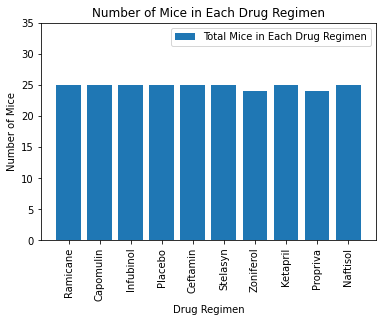

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Creating bar plot using pyplot showing the total number of mice for each drug regimen

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.ylim([0, 35])

plt.bar(regimens, mice_num, label = "Total Mice in Each Drug Regimen")
plt.legend()
plt.show()

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Preparing data
gender_dist = cleandata_df.groupby("Sex")["Mouse ID"].nunique()
gender_dist

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

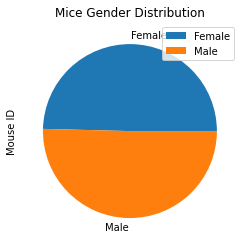

In [66]:
# Creating a pie plot using pandas to show gender distribution

plt.title("Mice Gender Distribution")
gender_dist.plot.pie()
plt.legend()
plt.show()

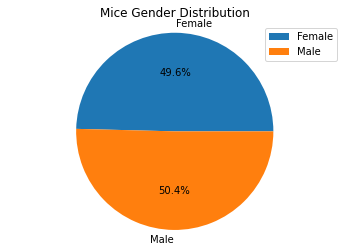

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = gender_dist

fig1, ax1 = plt.subplots()
plt.title("Mice Gender Distribution")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse by sorting (descending) and dropping the earlier timepointsvalues:
time_sort_df = cleandata_df.sort_values(by="Timepoint", ascending=False)
time_sort_df = time_sort_df.drop_duplicates(subset=["Mouse ID"], keep="first")

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
end_vol_df = time_sort_df.loc[(time_sort_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"]))]
end_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [69]:
# Putting treatments into a list for for loop (and later for plot labels)
treatment_list = end_vol_df["Drug Regimen"].unique().tolist()

# Locating the rows which contain mice on each drug and get the tumor volumes
end_vol_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
360,g316,Capomulin,40.159220
124,y793,Capomulin,31.896238
1855,y865,Ceftamin,64.729837
350,v923,Capomulin,40.658124
1379,p438,Ceftamin,61.433892
...,...,...,...
449,w678,Ramicane,43.166373
1743,x226,Ceftamin,45.000000
594,b447,Ceftamin,45.000000
1583,u153,Ceftamin,45.000000


In [76]:
# Calculating the IQR and quantitatively determining if there are any potential outliers. 

for e, treatment in enumerate(treatment_list):
    top_regimens = end_vol_df.loc[(end_vol_df["Drug Regimen"] == treatment)]
    
    # Tumor volumes for each regimen
    tumor_vol_reg = end_vol_df.loc[(end_vol_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"].tolist()
    
    # Quartile and IQR calculations for each regimen
    Q1 = top_regimens["Tumor Volume (mm3)"].quantile(0.25)
    Q2 = top_regimens["Tumor Volume (mm3)"].quantile(0.50)
    Q3 = top_regimens["Tumor Volume (mm3)"].quantile(0.75)
    IQR = round((Q3 - Q1), 2)
    lower_bound = round(Q1 - (1.5 * IQR),2)
    upper_bound = round(Q3 + (1.5 * IQR),2)
    
    # Outlier calculation for each regimen
    outliers = 0
    for tv in tumor_vol_reg:
        if tv < lower_bound and tv > upper_bound:
            outliers +=1
    
    # Print all calculations        
    print(f"{treatment} regimen: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}, IQR ={IQR}, Lower bound = {lower_bound}, Upper bound = {upper_bound}, Count of Outliers = {outliers}.")

Capomulin regimen: Q1 = 32.37735684, Q2 = 38.1251644, Q3 = 40.1592203, IQR =7.78, Lower bound = 20.71, Upper bound = 51.83, Count of Outliers = 0.
Ceftamin regimen: Q1 = 48.72207785, Q2 = 59.85195552, Q3 = 64.29983003, IQR =15.58, Lower bound = 25.35, Upper bound = 87.67, Count of Outliers = 0.
Ramicane regimen: Q1 = 31.56046955, Q2 = 36.56165229, Q3 = 40.65900627, IQR =9.1, Lower bound = 17.91, Upper bound = 54.31, Count of Outliers = 0.
Infubinol regimen: Q1 = 54.04860769, Q2 = 60.16518046, Q3 = 65.52574285, IQR =11.48, Lower bound = 36.83, Upper bound = 82.75, Count of Outliers = 0.


In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Creating a dataframe with tumor volume and drug regimen
reg_tvol = end_vol_df.reset_index() 
reg_tvol = end_vol_df[["Drug Regimen","Tumor Volume (mm3)"]] 

# Creating series by drug regimen
for e, treatment in enumerate(treatment_list):
    reg_(treatment) = reg_tvol.loc[reg_tvol["Drug Regimen"] == treatment]
    reg_(treatment) = reg_(treatment).reset_index()
    reg_(treatment)_series = reg_(treatment)["Tumor Volume (mm3)"]
    reg_(treatment)_s = pd.Series(reg_(treatment)_s)
    
    plot_data = reg_(treatment)_s
    plot_data = plot_data.append

#plot all series on same plot
    fig7, ax7 = plt.subplots()
    ax7.set_title('Regimen Samples')
    plt.xlabel("Regimen Samples")
    plt.ylabel("Tumor Volume (mm3)")
    plt.ylim(10,80)
    ax7.boxplot(data)
    plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', 'Ceftamin','Capomulin'])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-92-ff3e8de7e803>, line 11)

## Line and Scatter Plots

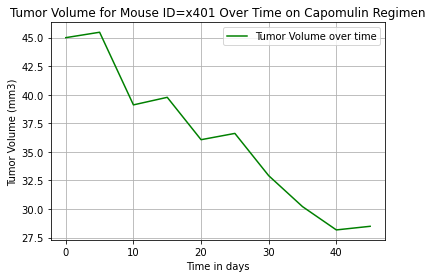

In [102]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_mice = cleandata_df.loc[cleandata_df["Drug Regimen"] == "Capomulin"]
Capomulin_mouse = cleandata_df.loc[cleandata_df["Mouse ID"] == "x401"] 
plt.title("Tumor Volume for Mouse ID=x401 Over Time on Capomulin Regimen")
plt.xlabel("Time in days")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"], color="green", label="Tumor Volume over time" )
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
